# Practice

In [68]:
import numpy as np
import random
import pandas as pd
import scipy.stats

import matplotlib as plt
import matplotlib.pyplot as plt
plt.rcdefaults()
import matplotlib as mpl
mpl.rc("figure", facecolor="white")
plt.rc('axes', axisbelow=True)
from functools import reduce

In [5]:
# page78, gaussian model of height

In [10]:
data = pd.read_csv('howell.txt', sep=';')
data.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041915,41.0,1
4,145.415,41.276872,51.0,0


In [15]:
# take adults only
data_old = data[data['age'] >= 18]
data_old.shape

(352, 4)

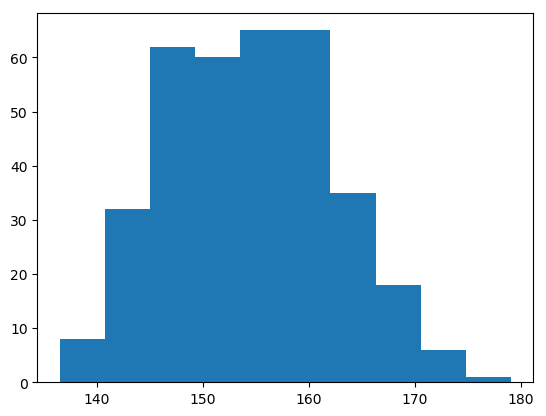

In [19]:
plt.hist(data_old['height'])
plt.show()

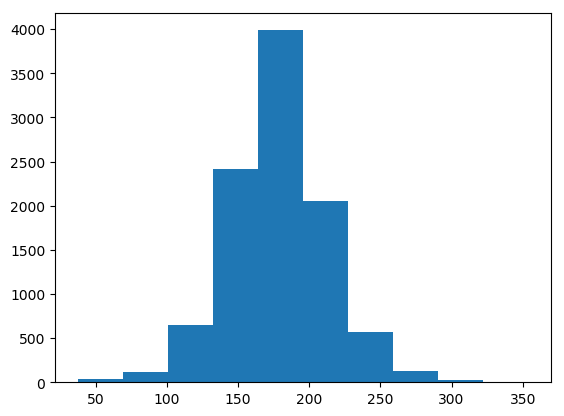

In [38]:
num = 10000
sample_mu = np.random.normal(178, 20, num)
sample_sigma = np.random.uniform(0, 50, num)
prior_h = np.random.normal(sample_mu, sample_sigma, num)
plt.hist(prior_h)
plt.show()

In [121]:
# get posterior distribution using the data
posterior = []
mus = np.arange(140, 170, step=(170-140)/100)
sigmas = np.arange(4, 10, step=(10-4)/100)

combos = []

s_ = []; m_ = []
for s in sigmas:
    for m in mus:
        s_.append(s)
        m_.append(m)
        
combos = pd.DataFrame({'mu':m_, 'sigma':s_})
combos.head()

,mu,sigma
0,140.0,4.0
1,140.3,4.0
2,140.6,4.0
3,140.9,4.0
4,141.2,4.0


In [122]:
posteriors = []
for m, s in zip(combos['mu'], combos['sigma']):
    m_prior = np.log(scipy.stats.norm.pdf(m, 178, 20))
    s_prior = np.log(scipy.stats.uniform.pdf(s, 0, 50))
    
    prior = m_prior * s_prior
    
    l_hood_x_prior = []
    for h in data_old['height']:
        l_hood_ = np.log(scipy.stats.norm.pdf(h, m, s))
        
        l_hood_x_prior.append(m_prior + s_prior + l_hood_)
            
    posteriors.append(sum(l_hood_x_prior))
    
    
    
    

In [123]:
combos['posterior'] = np.exp(posteriors - max(posteriors))

In [124]:
combos['posterior_prob'] = combos['posterior'] / combos['posterior'].sum()

In [125]:
combos[combos['posterior_prob'] == combos['posterior_prob'].max()]

,mu,sigma,posterior,posterior_prob
7661,158.3,8.56,1.0,0.017293


In [126]:
data_old['height'].mean()

154.59709261363636

In [127]:
data_old['height'].std()

7.742332137351996